Segmentation
=======

In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage.transform import resize

from mean_shift.mean_shift_utils import *
from mean_shift.mean_shift import *

Original image
----------------

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(-0.5, 99.5, 99.5, -0.5)

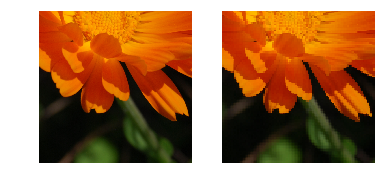

In [3]:
orig_img = plt.imread('data/DSC_0055.JPG')[1000:2000, 1600:2600]
plt.subplot(1, 2, 1)
plt.imshow(orig_img)
plt.axis('off')

resized_img = 255 * resize(orig_img, (orig_img.shape[0] / 10, orig_img.shape[1] / 10))
img = resized_img.astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.axis('off')

Mean Shift Filter
-----------------------------------

The kernel for segmentation
$$K_{h_s, h_r}(\mathbf{x}) = \frac{C}{{h^2_s} {h^p_r}}k(\|\frac{\mathbf{x}^s}{h_s}\|^2)k(\|\frac{\mathbf{x}^r}{h_r}\|^2)$$

(-0.5, 99.5, 99.5, -0.5)

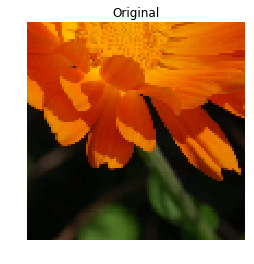

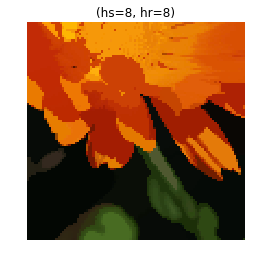

In [8]:
vecs = convert_img_vec(img)

## Demo
plt.imshow(vec2img(vecs, img.shape[:2]))
plt.title('Original')
plt.axis('off')

plt.figure()
plt.title('(hs=8, hr=8)')
plt.imshow(results[(8, 8)])
plt.axis('off')

In [5]:
bandwidths_list = [(8, 8), (8, 16), (16, 4), (16, 8), (16, 16)]
results = {}

for bandwidths in bandwidths_list:
    ms = mean_shift(kernel=segmentation_kernel)
    vec_c = ms.cluster(vecs, kernel_bandwidth=bandwidths)
    shift_im = vec2img(vec_c, img.shape[:2])
    results[bandwidths] = shift_im

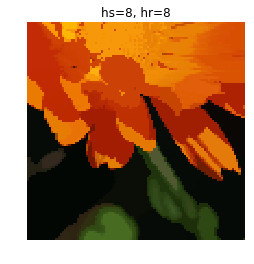

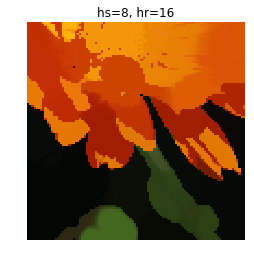

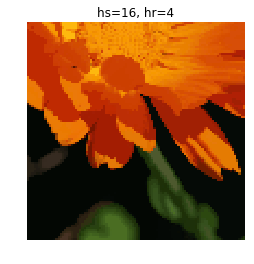

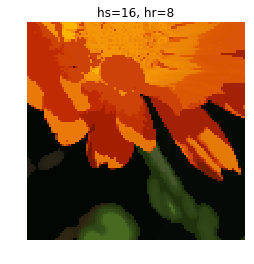

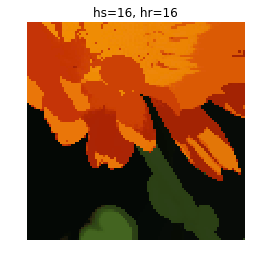

In [7]:
for key in bandwidths_list:
    value = results[key]
    hs, hr = key
    plt.figure()
    plt.axis('off')
    plt.title('hs={}, hr={}'.format(hs, hr))
    plt.imshow(value)

Segmentation based on Normalized Cut
----------------------------------------

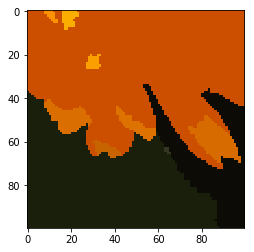

In [73]:
labels1 = segmentation.slic(img, compactness=30, n_segments=1000)
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)